In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

sns.set_theme(style='whitegrid', font_scale=1.5)
plt.rc('font', family='AppleGothic')
plt.rc('axes', unicode_minus=False)

In [2]:
data = pd.read_csv('2022.csv', encoding='CP949')
data.rename(columns={ '가구주_성별코드':'성별', '가구주_교육정도_학력코드':'학력', '가구주_직업대분류코드':'직업', '가구주_만연령':'연령',
       '자산_금융자산_저축금액':'저축', '자산_실물자산_부동산금액':'부동산', '부채_금융부채_담보대출금액':'담보대출', '부채_금융부채_신용대출금액':'신용대출',
       '경상소득(보완)':'소득', '지출_소비지출_식료품(외식비포함)':'식료지출', '지출_소비지출_주거비':'주거지출', '지출_소비지출_교육비(보육료포함)':'교육지출',
       '지출_비소비지출_세금(보완)':'세금'},inplace=True)
data['학력'] = data['학력'].astype('category')
data['직업'].fillna('기타',inplace=True)

In [3]:
data.head()

,수도권여부,성별,가구원수,학력,직업,연령,저축,부동산,담보대출,신용대출,소득,식료지출,주거지출,교육지출,세금
0,G1,1,1,1,기타,64,1,0,0,0,1379,660,312,0,0
1,G1,1,1,1,기타,74,2400,19300,0,0,1841,450,190,0,23
2,G1,1,1,1,기타,81,200,0,0,0,954,500,300,0,0
3,G1,1,1,1,기타,82,850,0,0,0,930,120,160,0,1
4,G1,1,1,1,기타,83,10500,36000,0,0,1157,360,150,0,42


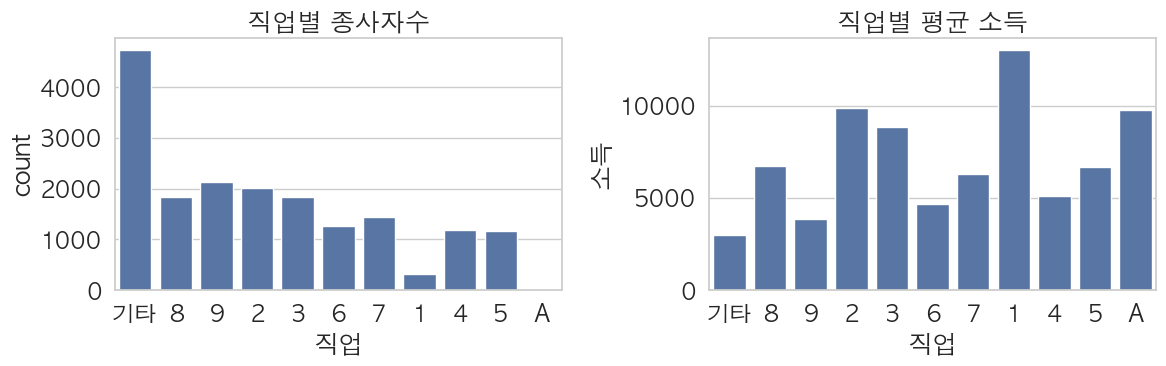

In [4]:
plt.figure(figsize=(12,4))


plt.subplot(1, 2, 1)  
sns.countplot(x='직업', data=data)
plt.title('직업별 종사자수')


plt.subplot(1, 2, 2)  
sns.barplot(data=data, x='직업', y='소득', estimator=np.mean, ci=None)
plt.title('직업별 평균 소득')


plt.tight_layout()
plt.show()

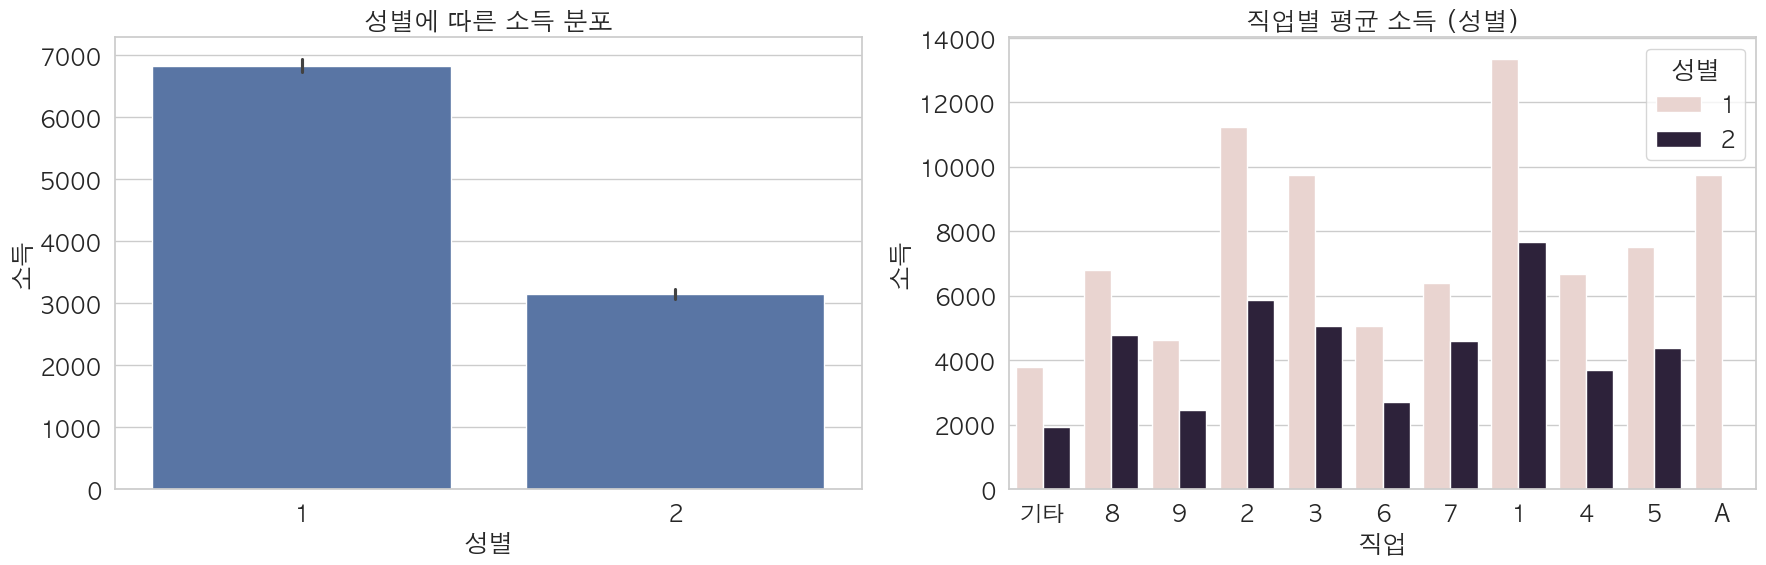

In [5]:
plt.figure(figsize=(18,6))

plt.subplot(1, 2, 1)  
sns.barplot(x='성별', y='소득', data=data)
plt.title('성별에 따른 소득 분포')

plt.subplot(1, 2, 2)  
sns.barplot(data=data, x='직업', y='소득', hue='성별', estimator=np.mean, ci=None)
plt.title('직업별 평균 소득 (성별)')


plt.tight_layout()
plt.show()


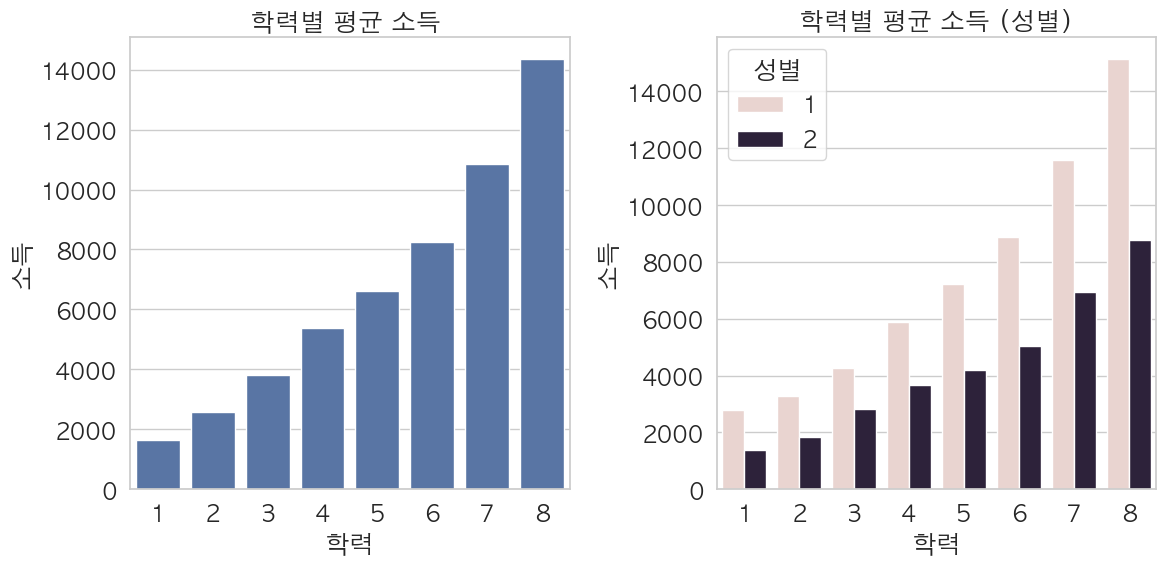

In [6]:
plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)
sns.barplot(data=data, x='학력', y='소득',  estimator=np.mean, ci=None)
plt.title('학력별 평균 소득 ')


plt.subplot(1, 2, 2)
sns.barplot(data=data, x='학력', y='소득', hue='성별', estimator=np.mean, ci=None)
plt.title('학력별 평균 소득 (성별)')

plt.tight_layout()
plt.show()

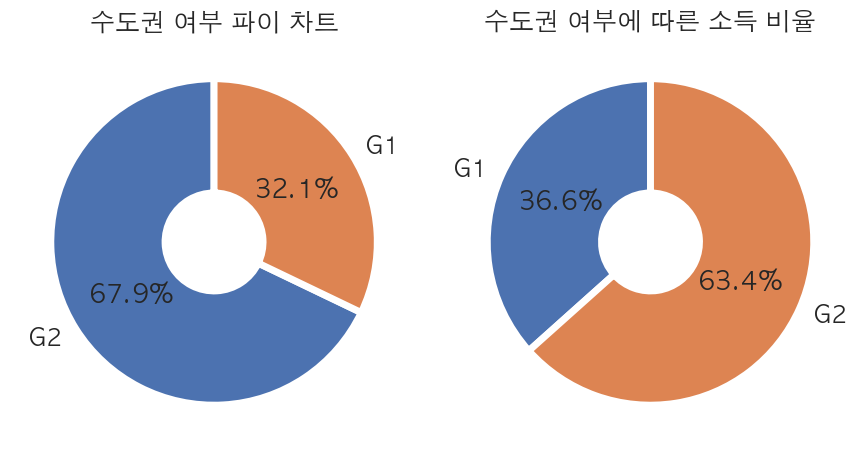

In [7]:
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.figure(figsize=(9, 6))

plt.subplot(1,2,1)
region_counts = data['수도권여부'].value_counts()
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', startangle=90,wedgeprops=wedgeprops)
plt.title('수도권 여부 파이 차트')


plt.subplot(1, 2, 2)
income_by_region = data.groupby('수도권여부')['소득'].sum()
plt.pie(income_by_region, labels=income_by_region.index, autopct='%1.1f%%', startangle=90,wedgeprops=wedgeprops)
plt.title('수도권 여부에 따른 소득 비율')

plt.tight_layout()

plt.show()
